In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import h5py
import numpy as np

sys.path.append("..")
import axionmirror.units_constants as uc

from config import pc_dict

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file('../matplotlibrc')

## CHIME reach

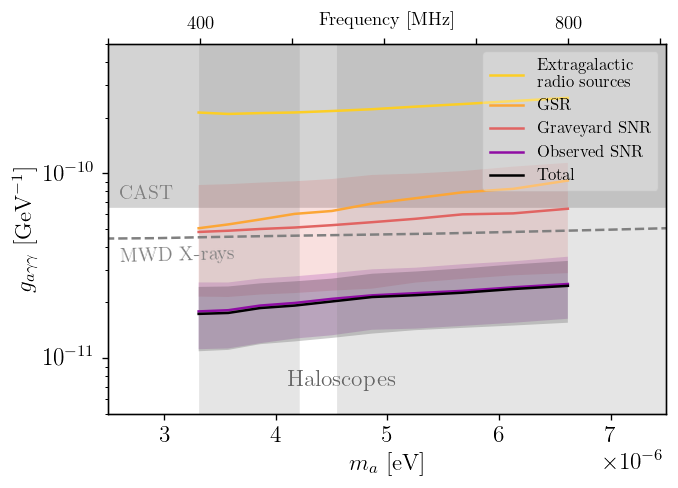

In [16]:
config_name = 'CHIME'
pc = pc_dict[config_name]

plot_names = ['egrs', 'gsr', 'snrg-base', 'snro-base', 'total-base']
plot_all_samples = False

label_dict = {
    'egrs' : 'Extragalactic\nradio sources',
    'gsr' : 'GSR',
    'snrg-base' : 'Graveyard SNR',
    'snro-base' : 'Observed SNR',
    'total-base' : 'Total',
}
color_dict = {
    'egrs' : cms['plasma'](0.9),
    'gsr' : cms['plasma'](0.8),
    'snrg-base' : cms['plasma'](0.6),
    'snro-base' : cms['plasma'](0.3),
    'total-base' : 'k',
}

fig, ax = plt.subplots()

for pn in plot_names:
    with h5py.File(f"../outputs/plot_data/{pc.name}/{pn}.h5", 'r') as hf:
        # nu_arr = np.delete(hf['nu'][:], 18, axis=0)
        # gagg_arr = np.delete(hf['gagg'][:], 18, axis=1)
        nu_arr = hf['nu'][:]
        gagg_arr = hf['gagg'][:]
        
        ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        
        if gagg_arr.shape[0] == 1:
            ax.plot(ma_arr, gagg_arr[0], color=color_dict[pn], label=label_dict[pn])
        else:
            if plot_all_samples:
                for i, gagg_sample in enumerate(gagg_arr):
                    ax.plot(ma_arr, gagg_sample, color=color_dict[pn], alpha=0.1,
                            label=(label_dict[pn] if i==0 else None), zorder=-1)
            else:
                ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color_dict[pn], label=label_dict[pn])
                ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.95, axis=0), np.quantile(gagg_arr, 0.05, axis=0),
                                alpha=0.2, facecolor=color_dict[pn], edgecolor='none')

ax.fill_between([1e-6, 1e-5], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray', zorder=-1)
ax.text(2.6e-6, 7.3e-11, 'CAST', color='gray')
# limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
# ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-')
# ax.text(2.6e-6, 2e-12, 'Pulsar polar cap', color='gray', rotation=-1.2)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--')
ax.text(2.6e-6, 3.3e-11, 'MWD X-rays', color='gray', rotation=1.5)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
ax.text(4.1e-6, 7e-12, 'Haloscopes', color=cms['binary'](0.6), fontsize=14)

ax.set(xlim=(2.5e-6, 7.5e-6), ylim=(5e-12, 5e-10), yscale='log')
ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')

ax_top = ax.twiny()
ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4*np.pi*uc.hbar))
ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
ax_top.set_xticks([300, 400, 500, 600, 700, 800, 900])
ax_top.set_xticklabels(['', '400', '', '', '', '800', ''], fontsize=11)
ax_top.xaxis.set_label_coords(0.5, 1.05)

legend = ax.legend(loc='upper right', fontsize=10, framealpha=0.3)
#legend.get_frame().set_facecolor((1, 1, 1, 0.2))
fig.savefig(f'../outputs/reach_plots/{config_name}.pdf')

## Full reach

In [2]:
def plot_full_reach_labels(ax, pc_names, color_dict, label_dict, label_xy_dict):
    for pc_name in pc_names:
        ax.text(*label_xy_dict[pc_name], label_dict[pc_name], color=color_dict[pc_name])

def plot_full_reach_extras(ax, mode='yhigh'):
    if mode == 'yhigh':
        txyr = {
            'c' : (3.5e-7, 7.3e-11),
            'ppc' : (3.5e-7, 2.1e-12),
            'mp' : (1.0e-6, 3.4e-11),
            'mx' : (3.5e-7, 3.2e-11),
            'h' : (3.7e-6, 1.3e-12),
            'mp r' : 40.,
        }
    else:
        txyr = {
            'c' : (3.5e-7, 7.3e-11),
            'ppc' : (3.5e-7, 2.1e-12),
            'mp' : (0.95e-6, 3.3e-11),
            'mx' : (3.5e-7, 3.2e-11),
            'h' : (3.7e-6, 1.3e-12),
            'mp r' : 43.,
        }
    ax.fill_between([1e-8, 1e-4], uc.gagg_CAST/uc.invGeV, 1e-8, color='lightgray', zorder=-10)
    ax.text(txyr['c'][0], txyr['c'][1], 'CAST', color='gray')
    limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/PulsarPolarCap.txt", unpack=True)
    ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-', alpha=0.5)
    ax.text(txyr['ppc'][0], txyr['ppc'][1], 'Pulsar polar cap', color='gray', rotation=1)
    limit_ma_arr, limit_gagg_arr_upper, limit_gagg_arr_lower = np.loadtxt("../data/limits/PulsarPolarCap_band.txt", unpack=True)
    ax.fill_between(10**limit_ma_arr, 10**limit_gagg_arr_upper, 10**limit_gagg_arr_lower, color='gray', alpha=0.1, ec=None)
    limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDPolarisation.txt", unpack=True)
    ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='-.', alpha=0.5)
    ax.text(txyr['mp'][0], txyr['mp'][1], 'MWD polarization', color='gray', rotation=txyr['mp r'])
    limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/MWDXrays.txt", unpack=True)
    ax.plot(limit_ma_arr, limit_gagg_arr, color='gray', ls='--', alpha=0.5)
    ax.text(txyr['mx'][0], txyr['mx'][1], 'MWD X-rays', color='gray')
    limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/ADMX2021.txt", unpack=True)
    ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
    limit_ma_arr, limit_gagg_arr = np.loadtxt("../data/limits/RBF_UF_Haloscopes.txt", unpack=True)
    ax.fill_between(limit_ma_arr, limit_gagg_arr, np.full_like(limit_gagg_arr, 1), color='gray', alpha=0.2, ec=None)
    ax.text(txyr['h'][0], txyr['h'][1], 'Haloscopes', color=cms['binary'](0.6))

def plot_samples(ax, sample_fn, color=None, mode='band', zorder=-1, max_n_sample=None, **kwargs):
    """Plot samples from a file.

    Args:
        mode {'band', 'base', 'samples'}
    """
    base_color = 'gray'
    alphas = [0.4, 0.1]

    with h5py.File(sample_fn, 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr = np.array(hf['gagg'][:])
        
    ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV
        
    if gagg_arr.shape[0] == 1:
        if mode == 'base':
            color = base_color
        default_kwargs = dict(color=color, zorder=zorder, lw=1)
        default_kwargs.update(kwargs)
        ax.plot(ma_arr, gagg_arr[0], **default_kwargs)
    else:
        if max_n_sample is not None:
            gagg_arr = gagg_arr[:max_n_sample]
        if mode == 'samples':
            for gagg_sample in gagg_arr:
                default_kwargs = dict(color=color, alpha=0.1, zorder=-1)
                default_kwargs.update(kwargs)
                ax.plot(ma_arr, gagg_sample, **default_kwargs)
        elif mode == 'base':
            zorder = -1
            ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=base_color, zorder=zorder)
            ax.plot(ma_arr, np.quantile(gagg_arr, 0.975, axis=0), alpha=0.5, color=base_color, lw=1, zorder=zorder, ls=':')
            ax.plot(ma_arr, np.quantile(gagg_arr, 0.025, axis=0), alpha=0.5, color=base_color, lw=1, zorder=zorder, ls=':')
        elif mode == 'median':
            default_kwargs = dict(color=color, zorder=zorder)
            default_kwargs.update(kwargs)
            ax.plot(ma_arr, np.median(gagg_arr, axis=0), **default_kwargs)
        else:
            ax.plot(ma_arr, np.median(gagg_arr, axis=0), color=color, lw=3, zorder=zorder)
            # ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.84, axis=0), np.quantile(gagg_arr, 0.16, axis=0),
            #                 alpha=alphas[0], facecolor=color, edgecolor='none', zorder=zorder)
            ax.fill_between(ma_arr, np.quantile(gagg_arr, 0.975, axis=0), np.quantile(gagg_arr, 0.025, axis=0),
                            alpha=alphas[1], facecolor=color, edgecolor=color, zorder=zorder)
            ax.plot(ma_arr, np.quantile(gagg_arr, 0.975, axis=0), color=color, lw=1, zorder=zorder, ls=':')
            ax.plot(ma_arr, np.quantile(gagg_arr, 0.025, axis=0), color=color, lw=1, zorder=zorder, ls=':')
            
def set_full_reach_axes(ax, y_upper=4e-10):
    ax.set(yscale='log', xscale='log')
    ax.set(xlim=(3e-7, 1.8e-5), ylim=(1e-12, y_upper))
    ax.set(xlabel='$m_a$ [eV]', ylabel=r'$g_{a\gamma\gamma}$ [GeV$^{-1}$]')

    ax_top = ax.twiny()
    ax_top.set(xscale=ax.get_xscale())
    ax_top.set_xlim(np.array(ax.get_xlim()) * uc.eV / (4 * np.pi * uc.hbar))
    ax_top.set_xlabel('Frequency [MHz]', fontsize=11)
    ax_top.xaxis.set_label_coords(0.5, 1.05)

In [14]:
color_dict = {
    'CHIME' : cms['plasma'](0.1),
    'HERA' : cms['plasma'](0.5),
    'CHORD' : cms['plasma'](0.8),
    'HIRAX256' : 'mediumseagreen',
    'BURSTT256' : 'royalblue',
    'HIRAX1024' : 'mediumseagreen',
    'BURSTT2048' : 'royalblue',
}
label_dict = {
    'CHIME' : 'CHIME',
    'HERA' : 'HERA',
    'CHORD' : 'CHORD',
    'HIRAX256' : 'HIRAX-256',
    'BURSTT256' : 'BURSTT-256',
    'HIRAX1024' : 'HIRAX-1024',
    'BURSTT2048' : 'BURSTT-2048',
}
zorder_dict = {
    'CHIME' : 10, 'HERA' : 9, 'CHORD' : 8,
    'HIRAX256' : 7, 'HIRAX1024' : 16, 'BURSTT256' : 5, 'BURSTT2048' : 4,
}
label_xy_dict = {
    'HERA' : (1.1e-6, 6e-12),
    'CHORD' : (8e-6, 1.3e-11),
    'CHIME' : (8e-6, 0.8e-11),
    'HIRAX256' : (7.2e-6, 1.2e-11),
    'BURSTT256' : (1.0e-6, 1.9e-11),
    'HIRAX1024' : (4e-6, 3e-12),
    'BURSTT2048' : (1.5e-6, 3e-12),
}

### 2.1 base

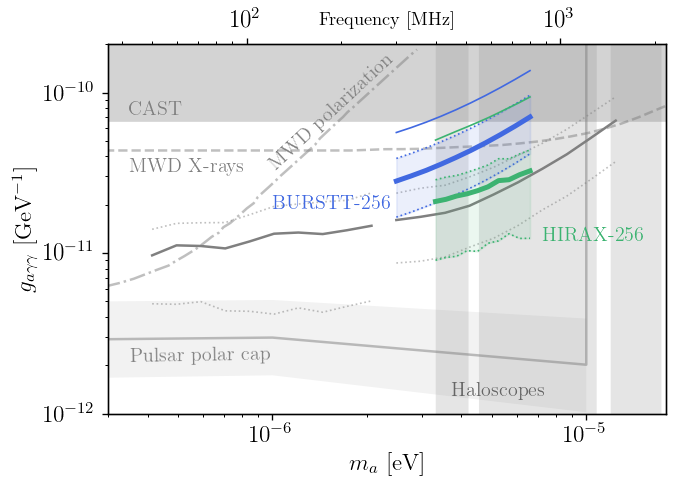

In [15]:
save_name = 'reach2'
pc_names = ['HIRAX256', 'BURSTT256']
base_names = ['HERA', 'CHORD']
# save_name = 'reach'
# pc_names = ['HERA', 'CHORD', 'CHIME', 'HIRAX1024', 'BURSTT2048']
# base_names = []

fig, ax = plt.subplots()

for pc_name in pc_names + base_names:
    pc = pc_dict[pc_name]
    samples_fn = f"../outputs/plot_data/{pc.name}/total-base.h5"
    plot_samples(ax, samples_fn, color=color_dict[pc_name], mode=('band' if pc_name in pc_names else 'base'), zorder=zorder_dict[pc_name])

    if pc_name in pc_names:
        samples_fn = f"../outputs/plot_data/{pc.name}/gsr.h5"
        plot_samples(ax, samples_fn, color=color_dict[pc_name], mode='median', zorder=zorder_dict[pc_name])
    
plot_full_reach_labels(ax, pc_names, color_dict, label_dict, label_xy_dict)
plot_full_reach_extras(ax, mode='ylow')
set_full_reach_axes(ax, y_upper=2e-10)

if save_name == 'reach':
    ax.plot([2.6e-6, 2.6e-6], [4.1e-12, 6.8e-12], color=color_dict['BURSTT2048'], lw=1)
    ax.plot([5.0e-6, 5.0e-6], [4.1e-12, 6.7e-12], color=color_dict['HIRAX1024'], lw=1)
    ax.plot([6.7e-6, 7.9e-6], [1.4e-11, 1.0e-11], color=color_dict['CHIME'], lw=1)

if save_name is not None:
    fig.savefig(f'../outputs/reach_plots/{save_name}.pdf')

### 2.2 band var

In [97]:
label_xy_dict = {
    'HERA' : (1.1e-6, 5.3e-12),
    'CHORD' : (8e-6, 1.3e-11),
    'CHIME' : (4e-6, 8e-12),
    'HIRAX256' : (7.2e-6, 1.2e-11),
    'BURSTT256' : (1.1e-6, 2.0e-11),
    'HIRAX1024' : (4e-6, 3e-12),
    'BURSTT2048' : (1.5e-6, 3e-12),
}

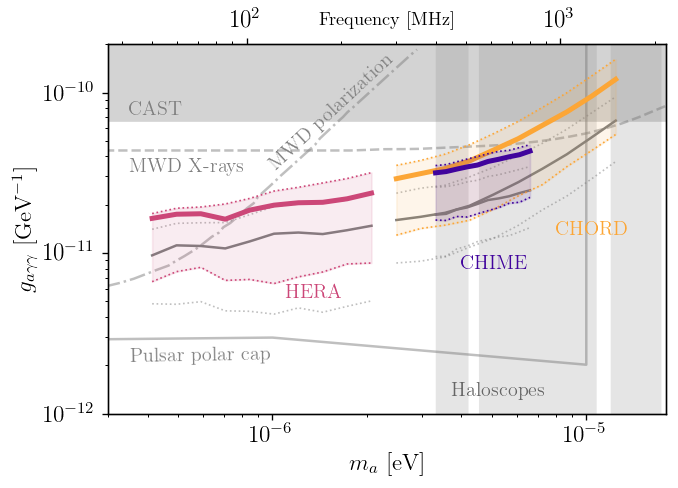

In [114]:
pc_names = ['HERA', 'CHORD', 'CHIME']
var_flag = 'nofree'

fig, ax = plt.subplots()

for pc_name in pc_names:
    pc = pc_dict[pc_name]
    samples_prefix = f"../outputs/plot_data/{pc.name}"
    plot_samples(ax, samples_prefix+"/total-base.h5", mode='base')
    plot_samples(ax, samples_prefix+f"/total-{var_flag}.h5", mode='band', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    
plot_full_reach_labels(ax, pc_names, color_dict, label_dict, label_xy_dict)
plot_full_reach_extras(ax, mode='ylow')
set_full_reach_axes(ax, y_upper=2e-10)

fig.savefig(f'../outputs/reach_plots/reach_{var_flag}.pdf')

In [99]:
pc = pc_dict['CHIME']

In [111]:
with h5py.File(f"../outputs/plot_data/{pc.name}/total-nofree.h5", 'r') as hf:
    nu_arr = np.array(hf['nu'][:])
    gagg_arr = np.array(hf['gagg'][:])

In [ ]:
for line in gagg_arr:
    plt.plot(nu_arr, line)
plt.loglog()

### 2.3 Median var

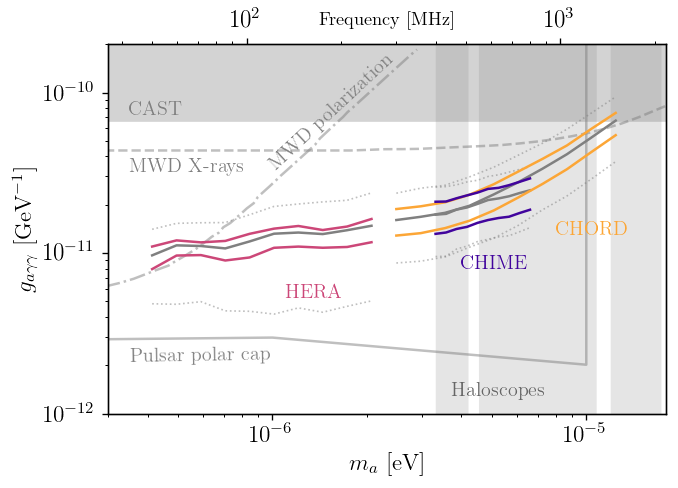

In [95]:
pc_names = ['HERA', 'CHORD', 'CHIME']
var_flags = ['tf30', 'tf300']
save_name = 'tf'

fig, ax = plt.subplots()

for pc_name in pc_names:
    pc = pc_dict[pc_name]
    samples_prefix = f"../outputs/plot_data/{pc.name}"
    plot_samples(ax, samples_prefix+"/total-base.h5", mode='base')
    plot_samples(ax, samples_prefix+f"/total-{var_flags[0]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    plot_samples(ax, samples_prefix+f"/total-{var_flags[1]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    
plot_full_reach_labels(ax, pc_names, color_dict, label_dict, label_xy_dict)
plot_full_reach_extras(ax, mode='ylow')
set_full_reach_axes(ax, y_upper=2e-10)

fig.savefig(f'../outputs/reach_plots/reach_{save_name}.pdf')

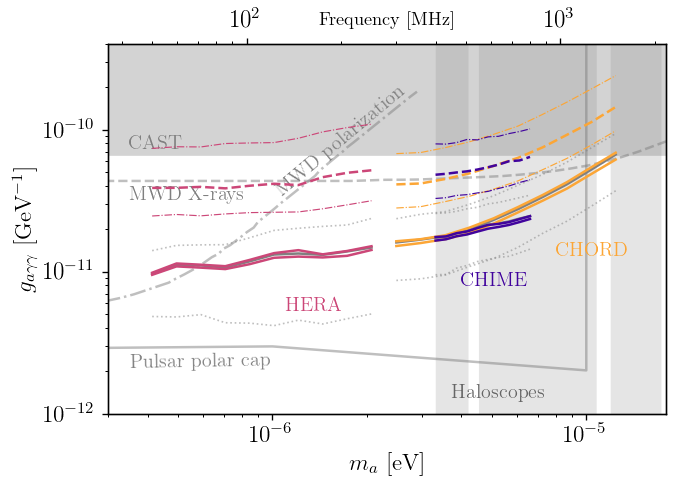

In [96]:
pc_names = ['HERA', 'CHORD', 'CHIME']
var_flags = ['srlow', 'srhigh']
save_name = 'sr_g'

fig, ax = plt.subplots()

for pc_name in pc_names:
    pc = pc_dict[pc_name]
    samples_prefix = f"../outputs/plot_data/{pc.name}"
    plot_samples(ax, samples_prefix+"/total-base.h5", mode='base')
    plot_samples(ax, samples_prefix+f"/snrg-base.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name], ls='--')
    plot_samples(ax, samples_prefix+f"/snrg-{var_flags[0]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name], ls='-.', lw=0.7)
    plot_samples(ax, samples_prefix+f"/snrg-{var_flags[1]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name], ls='-.', lw=0.7)
    plot_samples(ax, samples_prefix+f"/total-{var_flags[0]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    plot_samples(ax, samples_prefix+f"/total-{var_flags[1]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    
plot_full_reach_labels(ax, pc_names, color_dict, label_dict, label_xy_dict)
plot_full_reach_extras(ax)
set_full_reach_axes(ax)

fig.savefig(f'../outputs/reach_plots/reach_{save_name}.pdf')

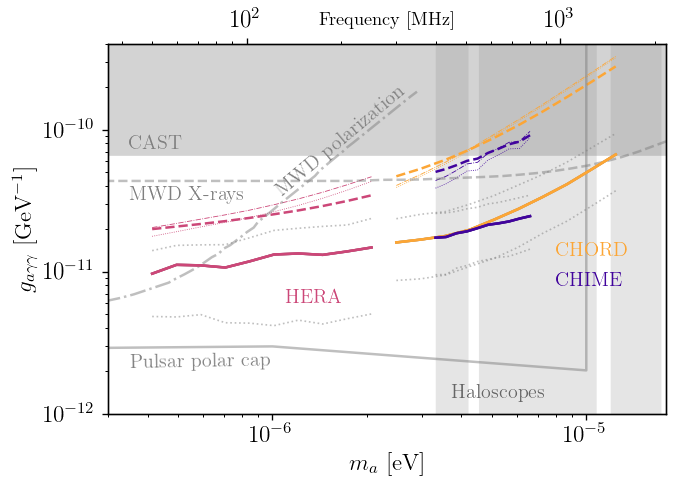

In [35]:
pc_names = ['HERA', 'CHORD', 'CHIME']
var_flags = ['gsrAH', 'gsrBH']
save_name = 'gsr'

fig, ax = plt.subplots()

for pc_name in pc_names:
    pc = pc_dict[pc_name]
    samples_prefix = f"../outputs/plot_data/{pc.name}"

    with h5py.File(samples_prefix+f"/gsr.h5", 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr = np.array(hf['gagg'][:])[0]

    with h5py.File(samples_prefix+f"/gsrAH.h5", 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr_AH = np.array(hf['gagg'][:])[0]

    with h5py.File(samples_prefix+f"/gsrBH.h5", 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr_BH = np.array(hf['gagg'][:])[0]

    ma_arr = 4 * np.pi * uc.hbar * nu_arr / uc.eV

    amplify_factor = 30
    ax.plot(ma_arr, gagg_arr, color=color_dict[pc_name], ls='--')
    ax.plot(ma_arr, gagg_arr + (gagg_arr_AH-gagg_arr)*amplify_factor, color=color_dict[pc_name], ls='-.', lw=0.5)
    ax.plot(ma_arr, gagg_arr + (gagg_arr_BH-gagg_arr)*amplify_factor, color=color_dict[pc_name], ls=':', lw=0.5)

    plot_samples(ax, samples_prefix+"/total-base.h5", mode='base')
    # plot_samples(ax, samples_prefix+f"/gsr.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name], ls='--')
    # plot_samples(ax, samples_prefix+f"/{var_flags[0]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name], ls='-.', lw=0.7)
    # plot_samples(ax, samples_prefix+f"/{var_flags[1]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name], ls=':', lw=0.7)
    plot_samples(ax, samples_prefix+f"/total-{var_flags[0]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    plot_samples(ax, samples_prefix+f"/total-{var_flags[1]}.h5", mode='median', color=color_dict[pc_name], zorder=zorder_dict[pc_name])
    
plot_full_reach_labels(ax, pc_names, color_dict, label_dict, label_xy_dict)
plot_full_reach_extras(ax)
set_full_reach_axes(ax)

fig.savefig(f'../outputs/reach_plots/reach_{save_name}.pdf')

In [21]:
pc = pc_dict['HERA']
samples_prefix = f"../outputs/plot_data/{pc.name}"
with h5py.File(samples_prefix+f"/gsr.h5", 'r') as hf:
    nu_arr = np.array(hf['nu'][:])
    gagg_arr = np.array(hf['gagg'][:])

with h5py.File(samples_prefix+f"/gsrAH.h5", 'r') as hf:
    nu_arr = np.array(hf['nu'][:])
    gagg_arr_AH = np.array(hf['gagg'][:])

with h5py.File(samples_prefix+f"/gsrBH.h5", 'r') as hf:
    nu_arr = np.array(hf['nu'][:])
    gagg_arr_BH = np.array(hf['gagg'][:])


In [ ]:
plt.plot(gagg_arr_AH[0]/gagg_arr[0])
plt.plot(gagg_arr_BH[0]/gagg_arr[0])

In [ ]:
plt.plot(gagg_arr_AH[0], 'r')
plt.plot(gagg_arr[0], 'k')
plt.plot(gagg_arr_BH[0], 'b')

In [ ]:
for pc_name in ['CHIME', 'HERA', 'CHORD', 'HIRAX256', 'HIRAX1024', 'BURSTT256', 'BURSTT2048']:
    pc = pc_dict[pc_name]
    samples_prefix = f"../outputs/plot_data/{pc.name}"
    with h5py.File(samples_prefix+f"/total-base.h5", 'r') as hf:
        nu_arr = np.array(hf['nu'][:])
        gagg_arr = np.array(hf['gagg'][:])
    print(np.median(gagg_arr) / np.median(gagg_arr[:150]))
    print(np.quantile(gagg_arr, 0.975) / np.quantile(gagg_arr[:150], 0.975))
    print(np.quantile(gagg_arr, 0.025) / np.quantile(gagg_arr[:150], 0.025))

In [21]:
data_dir = "/n/holyscratch01/iaifi_lab/yitians/all_sky_gegenschein/axion-mirror/outputs/intermediates/CHIME-nnu10-nra1-ndec1"
z1 = np.load(f"{data_dir}/snr-obs-base/snr-obs-base-inu0-ira0-idec0.npy")
z2 = np.load(f"{data_dir}/snr-graveyard-base/snr-graveyard-base-inu0-ira0-idec0.npy")
z3 = np.load(f"{data_dir}/gsrJF/gsrJF-inu0-ira0-idec0.npy")
b = np.load(f"{data_dir}/bkg/bkg-inu0-ira0-idec0.npy")

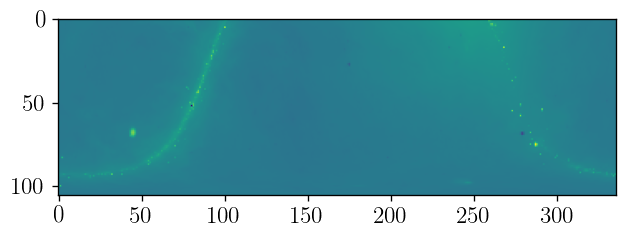

In [22]:
plt.imshow(np.log(np.median((z1+z2+z3)/b, axis=0)))